# California Housing

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import locale as locale
from money import Money
from sklearn import model_selection as model

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
FONT_SIZE = 20

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize

transparency = 0.75

In [47]:
cal_housing = pd.read_csv('./cal_housing.data', header=None \
            , names=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms' \
                   , 'population','households','medianIncome','medianHouseValue']
)
cal_housing['id'] = (cal_housing.longitude * 1000) + (cal_housing.latitude)
cal_housing.head(n=3)
#cal_housing['id'].value_counts()
#cal_housing[cal_housing.id == -122372.20]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-122202.15


In [29]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
cal_housing.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111def6a0>,
      dtype=object)

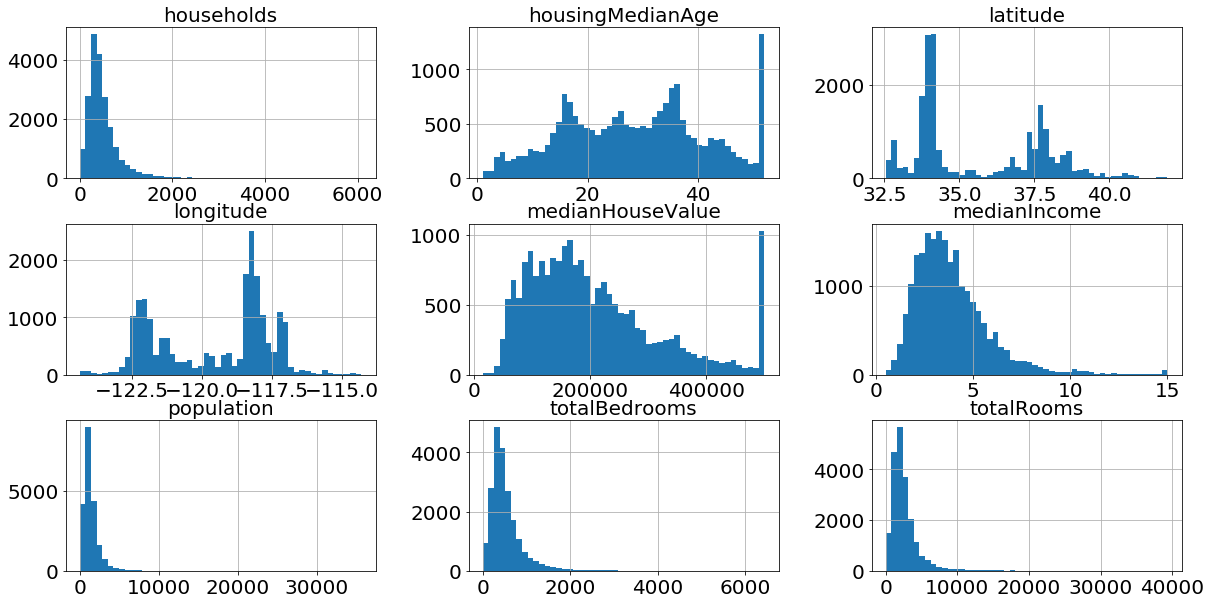

In [14]:
cal_housing.hist(bins=50)

In [17]:
trainSet, testSet = model.train_test_split(cal_housing, test_size=0.2, random_state=42)

In [28]:
print(trainSet.info())
print()
print('*********************')
print()
print(testSet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
longitude           16512 non-null float64
latitude            16512 non-null float64
housingMedianAge    16512 non-null float64
totalRooms          16512 non-null float64
totalBedrooms       16512 non-null float64
population          16512 non-null float64
households          16512 non-null float64
medianIncome        16512 non-null float64
medianHouseValue    16512 non-null float64
dtypes: float64(9)
memory usage: 1.3 MB
None

*********************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 9 columns):
longitude           4128 non-null float64
latitude            4128 non-null float64
housingMedianAge    4128 non-null float64
totalRooms          4128 non-null float64
totalBedrooms       4128 non-null float64
population          4128 non-null float64
households          4128 non-null float64
medianIncome        4128 non

In [49]:
corr_matrix = cal_housing.corr()

In [52]:
corr_matrix['medianHouseValue'].sort_values(ascending=False)

medianHouseValue    1.000000
medianIncome        0.688075
totalRooms          0.134153
housingMedianAge    0.105623
households          0.065843
totalBedrooms       0.050594
population         -0.024650
longitude          -0.045967
id                 -0.046166
latitude           -0.144160
Name: medianHouseValue, dtype: float64